### Postsecondary enrolments in Canada

In this project I analyze the Postsecondary enrolments in Canada data from Statistics Canada. This survey is done by Postsecondary Student Information System (PSIS). The Postsecondary Student Information System (PSIS) is a national survey that enables Statistics Canada to provide detailed information on enrolments and graduates of Canadian public postsecondary institutions in order to meet policy and planning needs in the field of postsecondary education.

Data Link: Statistics Canada. Table 37-10-0015-01  Postsecondary enrolments, by credential type, age group, registration status, program type and gender
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3710001501

Data release - November 22, 2023

Data Timeline: 1992/1993 - 2021/2022

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("data.csv")
df.head()

,REF_DATE,GEO,DGUID,Institution type,Program type,Credential type,Field of study,Registration status,Gender,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type","Total, field of study","Total, registration status","Total, gender",Number,223,units,0,v79464902,1.1.1.1.1.1.1,1355451.0,NaN,NaN,NaN,0
1,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type","Total, field of study","Total, registration status",Man,Number,223,units,0,v79464903,1.1.1.1.1.1.2,608616.0,NaN,NaN,NaN,0
2,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type","Total, field of study","Total, registration status",Woman,Number,223,units,0,v79464904,1.1.1.1.1.1.3,746838.0,NaN,NaN,NaN,0
3,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type","Total, field of study","Total, registration status",Gender unknown,Number,223,units,0,v79464905,1.1.1.1.1.1.4,NaN,..,NaN,NaN,0
4,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type","Total, field of study",Full-time student,"Total, gender",Number,223,units,0,v79464906,1.1.1.1.1.2.1,934176.0,NaN,NaN,NaN,0


In [39]:
df.shape

(3746875, 20)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3746875 entries, 0 to 3746874
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   REF_DATE             object 
 1   GEO                  object 
 2   DGUID                object 
 3   Institution type     object 
 4   Program type         object 
 5   Credential type      object 
 6   Field of study       object 
 7   Registration status  object 
 8   Gender               object 
 9   UOM                  object 
 10  UOM_ID               int64  
 11  SCALAR_FACTOR        object 
 12  SCALAR_ID            int64  
 13  VECTOR               object 
 14  COORDINATE           object 
 15  VALUE                float64
 16  STATUS               object 
 17  SYMBOL               float64
 18  TERMINATED           float64
 19  DECIMALS             int64  
dtypes: float64(3), int64(3), object(14)
memory usage: 571.7+ MB


In [41]:
df = df.drop(["DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", 
              "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"],axis=1)
df.head()

,REF_DATE,GEO,Institution type,Program type,Credential type,Field of study,Registration status,Gender,VALUE
0,1992/1993,Canada,"Total, institution type","Total, program type","Total, credential type","Total, field of study","Total, registration status","Total, gender",1355451.0
1,1992/1993,Canada,"Total, institution type","Total, program type","Total, credential type","Total, field of study","Total, registration status",Man,608616.0
2,1992/1993,Canada,"Total, institution type","Total, program type","Total, credential type","Total, field of study","Total, registration status",Woman,746838.0
3,1992/1993,Canada,"Total, institution type","Total, program type","Total, credential type","Total, field of study","Total, registration status",Gender unknown,NaN
4,1992/1993,Canada,"Total, institution type","Total, program type","Total, credential type","Total, field of study",Full-time student,"Total, gender",934176.0


In [42]:
df["Gender"].value_counts()

Total, gender     1128934
Woman             1095281
Man               1080193
Gender unknown     442467
Name: Gender, dtype: int64

In [43]:
df["Institution type"].value_counts()

Total, institution type    1650377
University                 1176704
College                     919794
Name: Institution type, dtype: int64

In [44]:
df["Program type"].value_counts()

Total, program type                                           886121
Career, technical or professional training program            493285
Undergraduate program                                         475395
Graduate program (second cycle)                               295702
Non-program (credit, undergraduate)                           182396
Graduate program (third cycle)                                163532
Basic education and skills program                            163445
Post-baccalaureate non-graduate program                       154103
Non-program (credit, other postsecondary)                     126362
Post career, technical or professional training program       122201
Non-program (credit, graduate)                                116740
Non-program (non-credit)                                      115960
Other programs                                                107107
Graduate qualifying program (second cycle)                     93066
Qualifying program for career, tec

In [45]:
df["Credential type"].value_counts()

Total, credential type                                1192167
Not applicable, credential type                        670383
Certificate                                            485038
Diploma                                                470165
Degree (includes applied degree)                       441060
Other type of credential associated with a program     274427
Attestation and other short program credentials        143601
Associate degree                                        41458
General Equivalency Diploma/high school diploma         28576
Name: Credential type, dtype: int64

In [46]:
df["Field of study"].value_counts()

Total, field of study                                              478069
Health and related fields [10]                                     311128
Business, management and public administration [5]                 310353
Humanities [3]                                                     295664
Other  [12]                                                        291262
Social and behavioural sciences and law [4]                        281034
Architecture, engineering and related technologies [8]             266611
Education [1]                                                      255795
Visual and performing arts, and communications technologies [2]    221282
Mathematics, computer and information sciences [7]                 220323
Physical and life sciences and technologies [6]                    209654
Agriculture, natural resources and conservation [9]                208769
Personal, protective and transportation services [11]              176284
Personal improvement and leisure [0]  

In [47]:
df["Registration status"].value_counts()

Total, registration status    1337095
Full-time student             1228130
Part-time student             1181650
Name: Registration status, dtype: int64

#### Trend over time

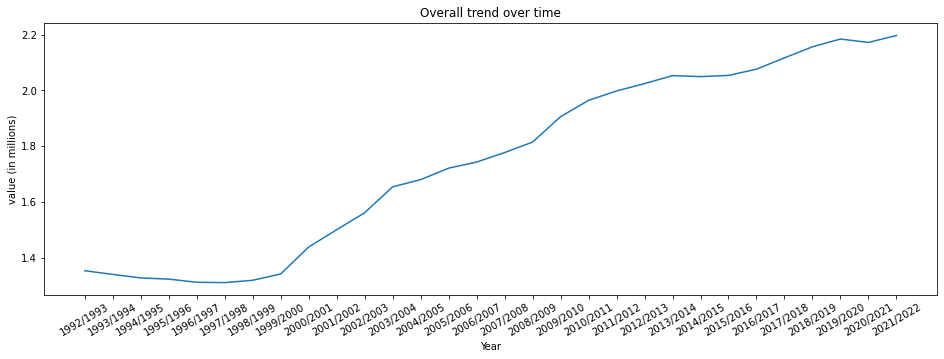

In [48]:
overall = df.loc[(df["Gender"] == "Total, gender") & (df["Registration status"] == "Total, registration status") & 
            (df["Field of study"] == "Total, field of study") & (df["Credential type"] == "Total, credential type") & 
            (df["Program type"] == "Total, program type") & (df["Institution type"] == "Total, institution type") & 
            (df["GEO"] == "Canada")]
fig = plt.subplots(figsize=(16, 5))
sns.lineplot(data=overall,x="REF_DATE",y=df["VALUE"]/1000000)
plt.title("Overall trend over time")
plt.xlabel("Year")
plt.ylabel("value (in millions)")
plt.xticks(rotation=30)
plt.show()

- From the year 1992/1993 - 1998/1999 there was a downward trend in admissions however after that there was a sudden rise in the admissions.
- The years between 2012 - 2016 the number of students admitted each year did not rise.
- During COVID-19 times there was a drop in admissions but it has recovered now.

The function below split the data on the desired factor gender, registration status, field of study, credential status, program type, and institution type. 

In [61]:
def get_df(data,split):
    if split == "gender":
        df = data.loc[(data["Gender"] != "Total, gender") & (data["Registration status"] == "Total, registration status") & 
            (data["Field of study"] == "Total, field of study") & (data["Credential type"] == "Total, credential type") & 
            (data["Program type"] == "Total, program type") & (data["Institution type"] == "Total, institution type")]
        df = df[["REF_DATE","GEO","Gender","VALUE"]]
    elif split == "registration":
        df = data.loc[(data["Gender"] == "Total, gender") & (data["Registration status"] != "Total, registration status") & 
            (data["Field of study"] == "Total, field of study") & (data["Credential type"] == "Total, credential type") & 
            (data["Program type"] == "Total, program type") & (data["Institution type"] == "Total, institution type")]
        df = df[["REF_DATE","GEO","Registration status","VALUE"]]
    elif split == "field":
        df = data.loc[(data["Gender"] == "Total, gender") & (data["Registration status"] == "Total, registration status") & 
            (data["Field of study"] != "Total, field of study") & (data["Credential type"] == "Total, credential type") & 
            (data["Program type"] == "Total, program type") & (data["Institution type"] == "Total, institution type")]
        df = df[["REF_DATE","GEO","Field of study","VALUE"]]
    elif split == "credential":
        df = data.loc[(data["Gender"] == "Total, gender") & (data["Registration status"] == "Total, registration status") & 
            (data["Field of study"] == "Total, field of study") & (data["Credential type"] != "Total, credential type") & 
            (data["Program type"] == "Total, program type") & (data["Institution type"] == "Total, institution type")]
        df = df[["REF_DATE","GEO","Credential type","VALUE"]]
    elif split == "program":
        df = data.loc[(data["Gender"] == "Total, gender") & (data["Registration status"] == "Total, registration status") & 
            (data["Field of study"] == "Total, field of study") & (data["Credential type"] == "Total, credential type") & 
            (data["Program type"] != "Total, program type") & (data["Institution type"] == "Total, institution type")]
        df = df[["REF_DATE","GEO","Program type","VALUE"]]
    else:
        df = data.loc[(data["Gender"] == "Total, gender") & (data["Registration status"] == "Total, registration status") & 
            (data["Field of study"] == "Total, field of study") & (data["Credential type"] == "Total, credential type") & 
            (data["Program type"] == "Total, program type") & (data["Institution type"] != "Total, institution type")]
        df = df[["REF_DATE","GEO","Institution type","VALUE"]]
    return df

The function below plots the required lineplot

In [50]:
def get_plot(data,hue):
    fig = plt.subplots(figsize=(16, 5))
    sns.lineplot(data=data,x="REF_DATE",y=data["VALUE"]/1000000,hue=hue)
    plt.title("{} trend over time based on {}".format(data["GEO"].iloc[0], hue))
    plt.xlabel("Year")
    plt.ylabel("value (in millions)")
    plt.xticks(rotation=30)
    plt.legend(loc=(1.04, 0))
    plt.show()

#### Canada trends

In [51]:
canada = df.loc[df["GEO"]=="Canada"]

#### Canada trends based on Gender

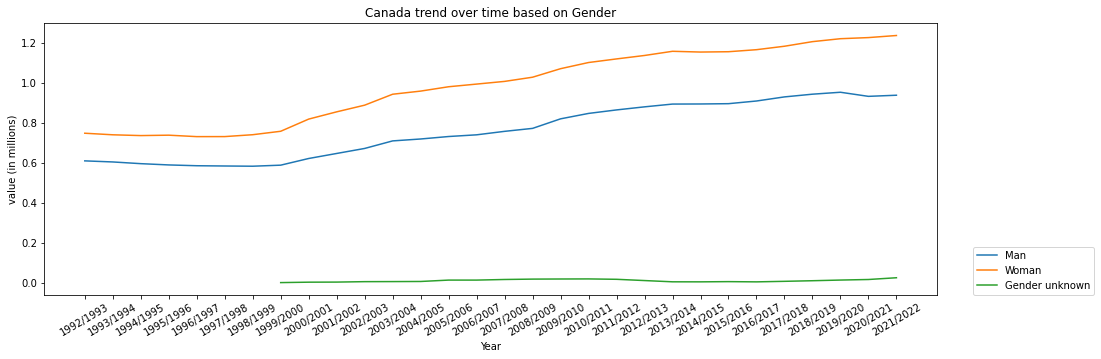

In [52]:
get_plot(get_df(canada,"gender"), "Gender")

#### Canada trends based on Registration status

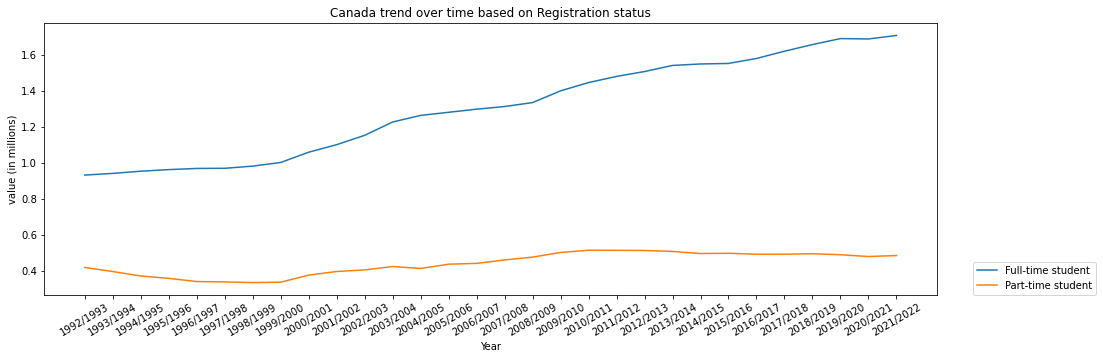

In [53]:
get_plot(get_df(canada, "registration"), "Registration status")

#### Canada trends based on Field of Study

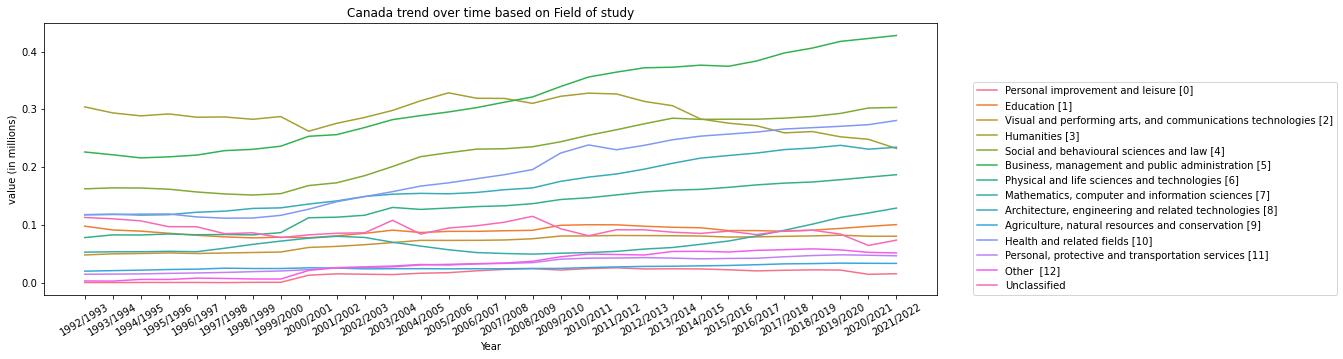

In [54]:
get_plot(get_df(canada, "field"), "Field of study")

#### Canada trends based on Credential Type

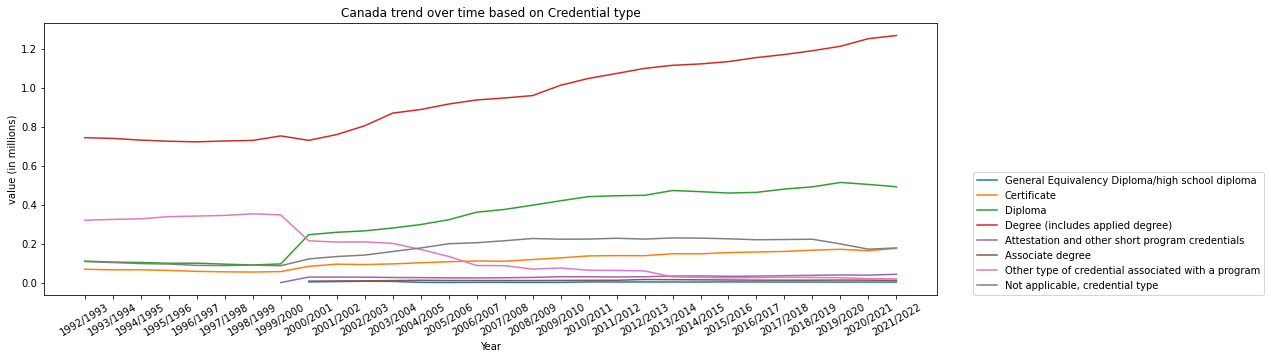

In [55]:
get_plot(get_df(canada, "credential"), "Credential type")

#### Canada trends based on Program Type

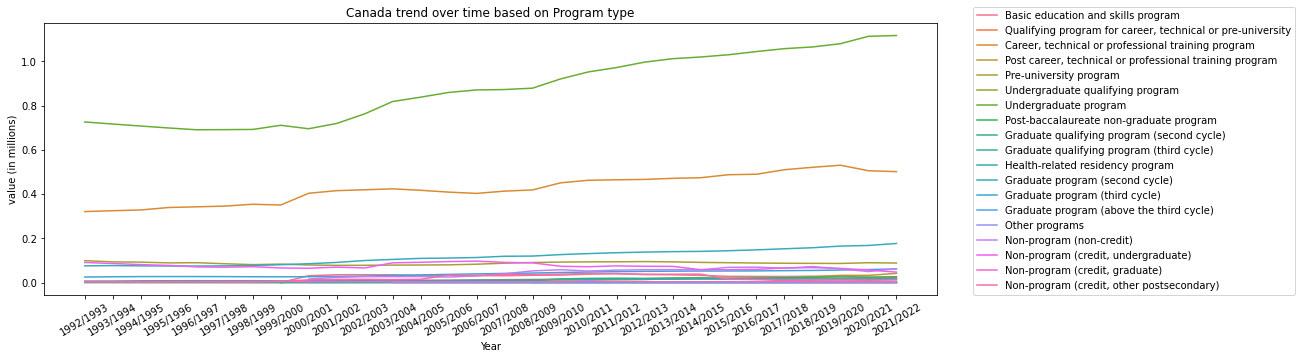

In [56]:
get_plot(get_df(canada, "program"), "Program type")

#### Canada trends based on Institution Type

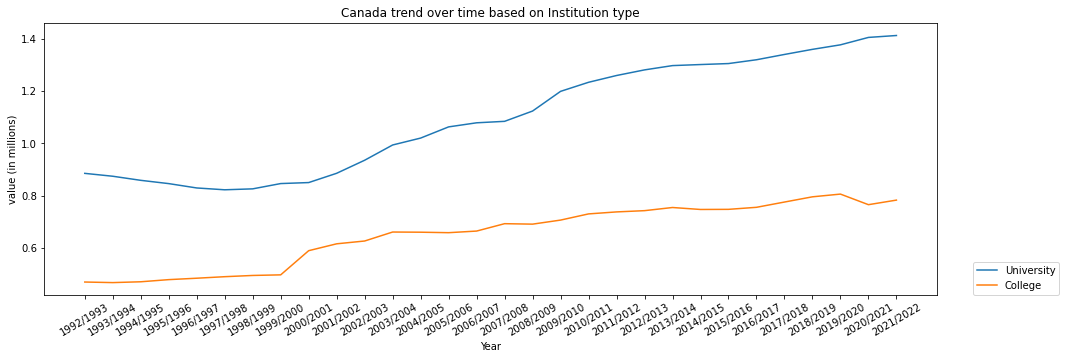

In [57]:
get_plot(get_df(canada, "institution"), "Institution type")

#### Canada trends based on Province

In [62]:
df_province = df.loc[(df["Gender"] == "Total, gender") & (df["Registration status"] == "Total, registration status") & 
            (df["Field of study"] == "Total, field of study") & (df["Credential type"] == "Total, credential type") & 
            (df["Program type"] == "Total, program type") & (df["Institution type"] == "Total, institution type") & 
            (df["GEO"] != "Canada")][["REF_DATE","GEO","VALUE"]]
df_province.head()

,REF_DATE,GEO,VALUE
24717,1992/1993,Newfoundland and Labrador,22683.0
31454,1992/1993,Prince Edward Island,4563.0
36579,1992/1993,Nova Scotia,41175.0
45658,1992/1993,New Brunswick,28029.0
54602,1992/1993,Quebec,449112.0


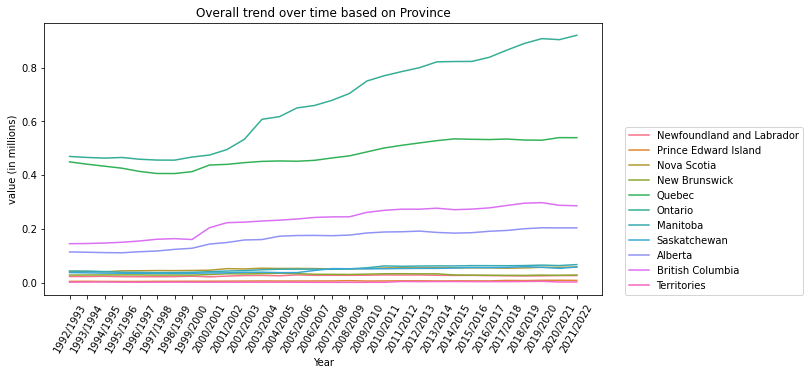

In [63]:
fig = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_province,x="REF_DATE",y=df_province["VALUE"]/1000000,hue="GEO")
plt.title("Overall trend over time based on Province")
plt.xlabel("Year")
plt.ylabel("value (in millions)")
plt.xticks(rotation=60)
plt.legend(loc=(1.04, 0))
plt.show()

Splitting data for Ontario, Alberta, British Columbia, Quebec

In [64]:
ontario = df.loc[(df["GEO"] == "Ontario")]
alberta = df.loc[(df["GEO"] == "Alberta")]
british_columbia = df.loc[(df["GEO"] == "British Columbia")]
quebec = df.loc[(df["GEO"] == "Quebec")]

#### Trends based on Gender

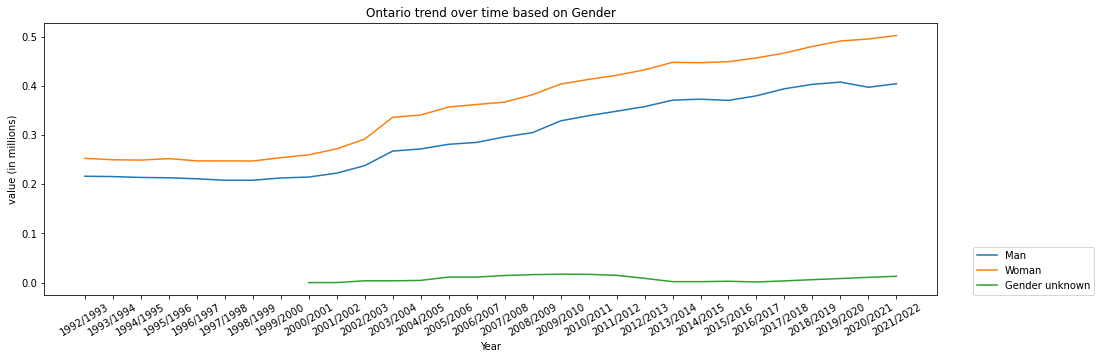

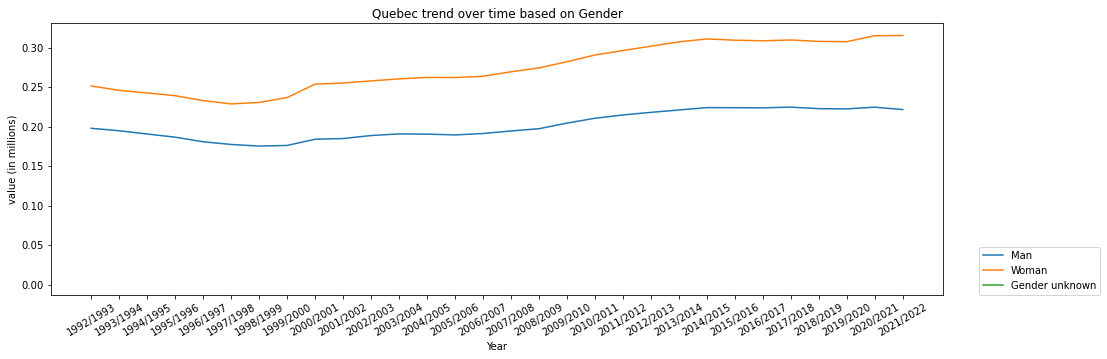

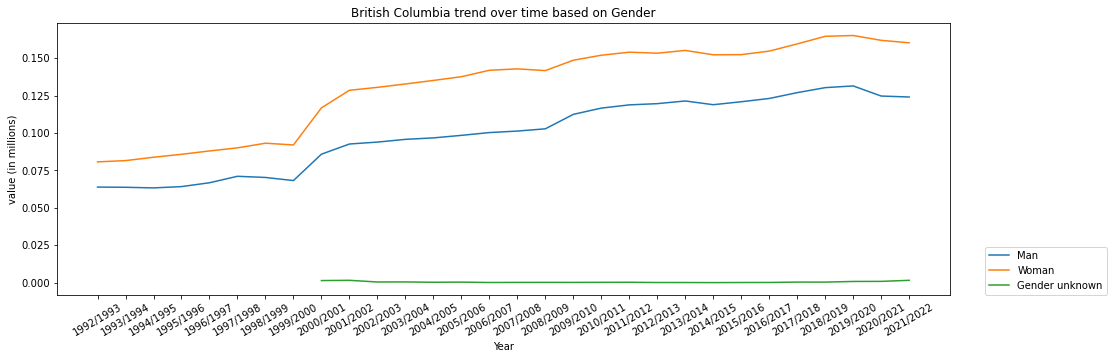

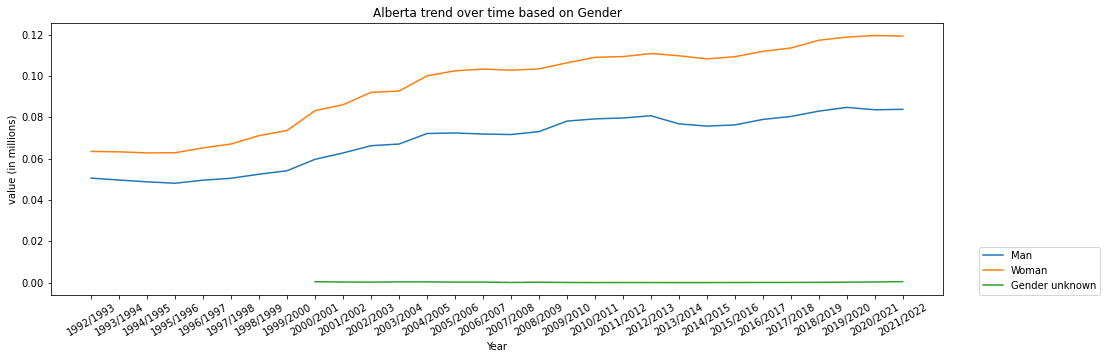

In [65]:
for province in [ontario, quebec, british_columbia, alberta]:
    get_plot(get_df(province,"gender"), "Gender")

- All the 4 provinces have similar trends. The Female admissions have always been more than the male enrolments.
- In Ontario, during COVID-19 pandemic the male admission dipped, however it did not had a impact on female admissions

#### Trends based on Registration status

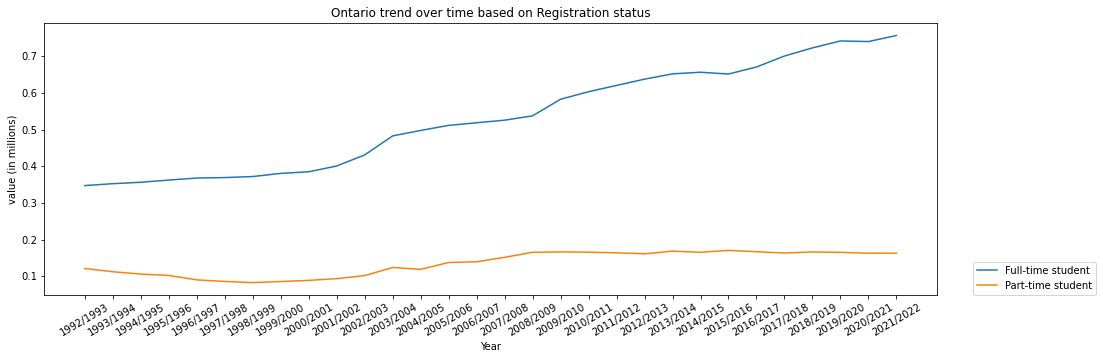

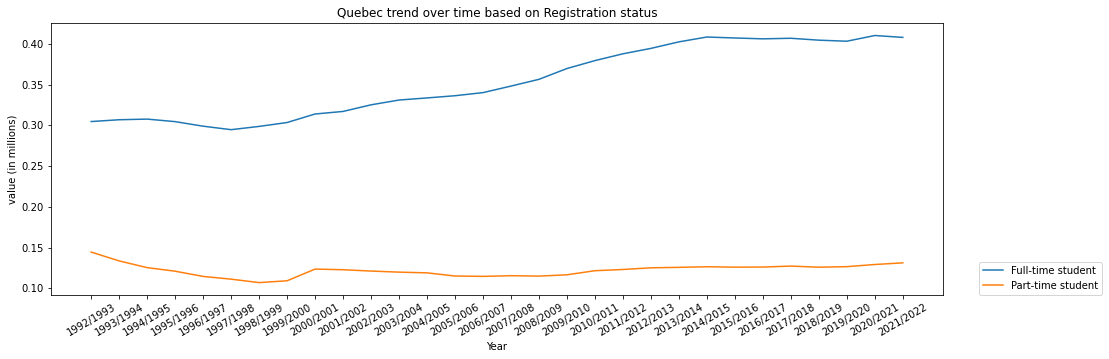

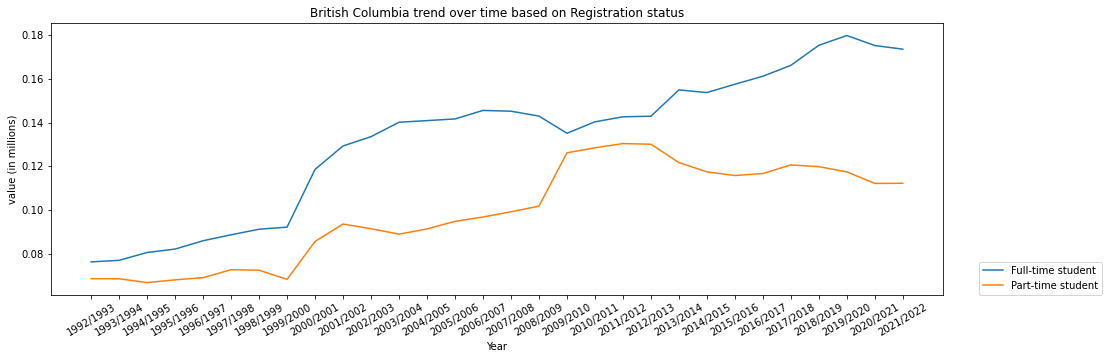

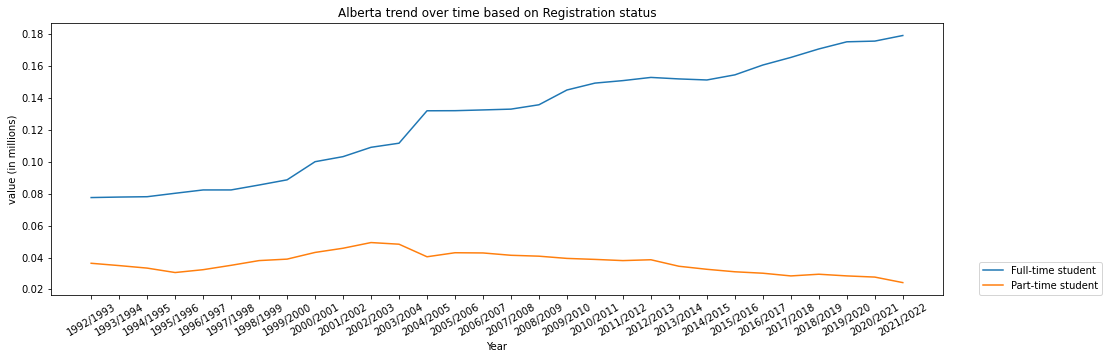

In [66]:
for province in [ontario, quebec, british_columbia, alberta]:
    get_plot(get_df(province,"registration"), "Registration status")

- In all the above provinces there is a similar patter that full-time admissions are always more than part-time enrolments. 
- In British Columbia, during 2009/2010 number of part-time students rise while full-time students decline. Moreover, during the last few years the full-time enrolments is in decilne as well. 

#### Trends based on Field of Study

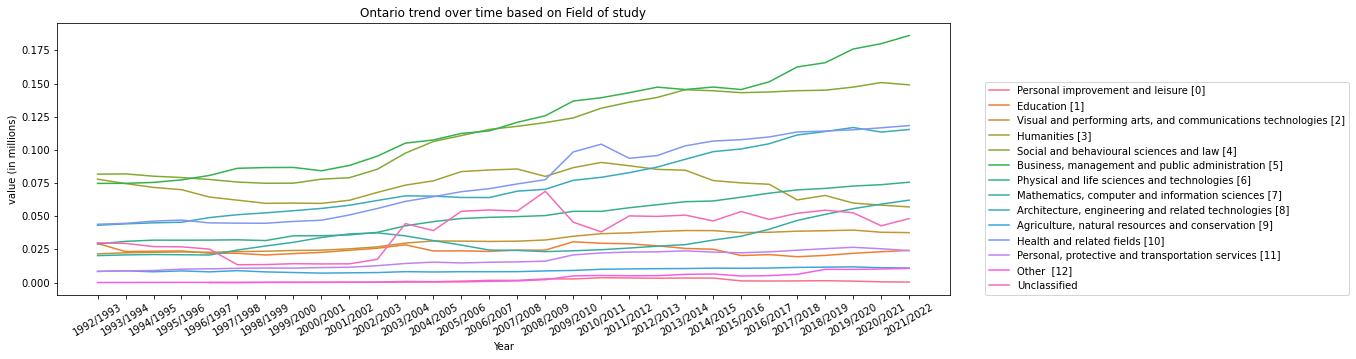

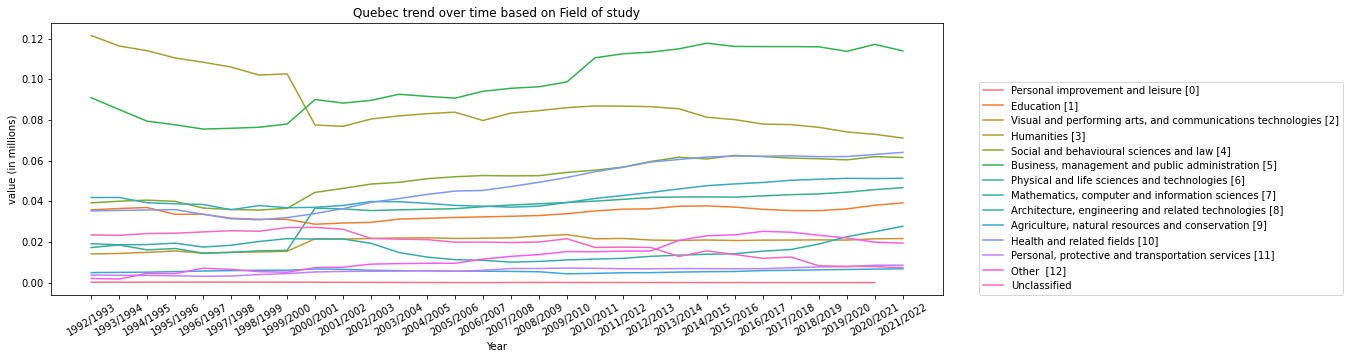

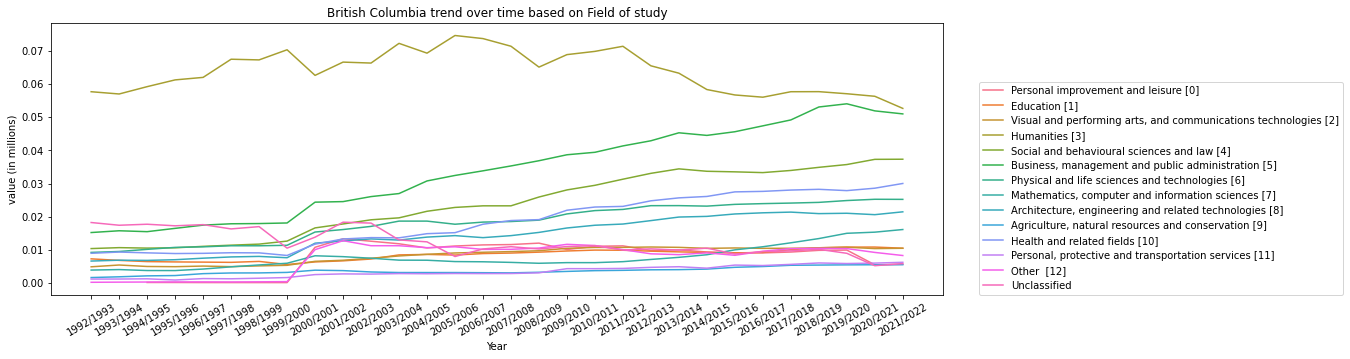

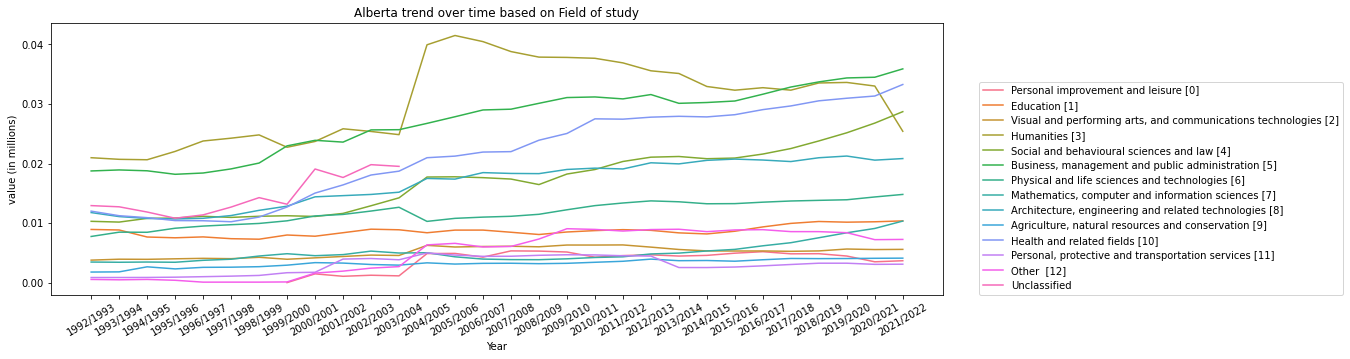

In [67]:
for province in [ontario, quebec, british_columbia, alberta]:
    get_plot(get_df(province,"field"), "Field of study")

#### Trends based on Credential Type

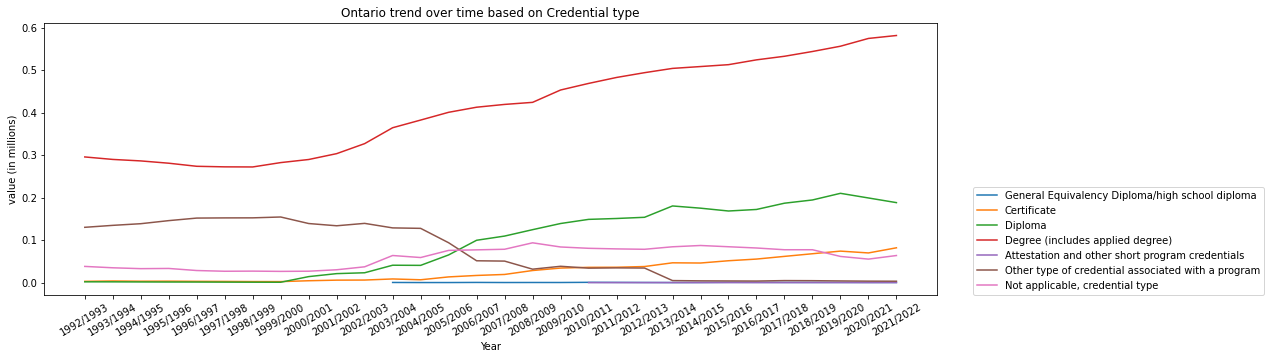

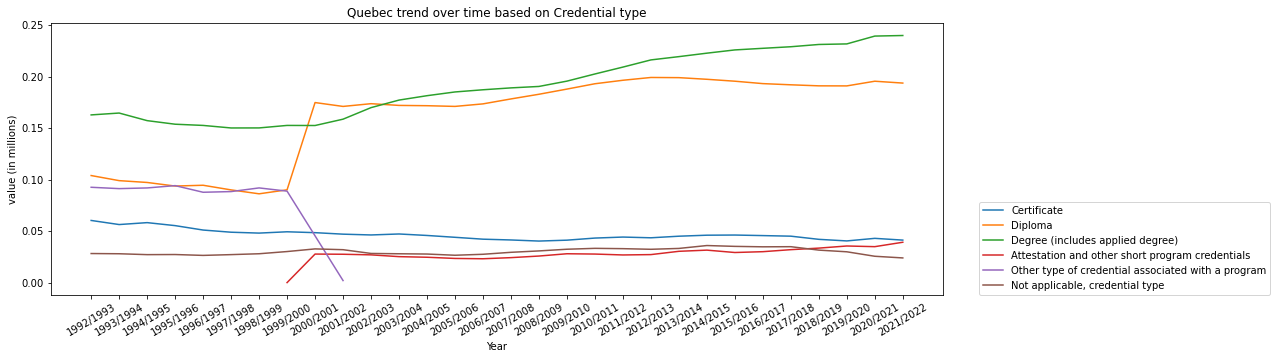

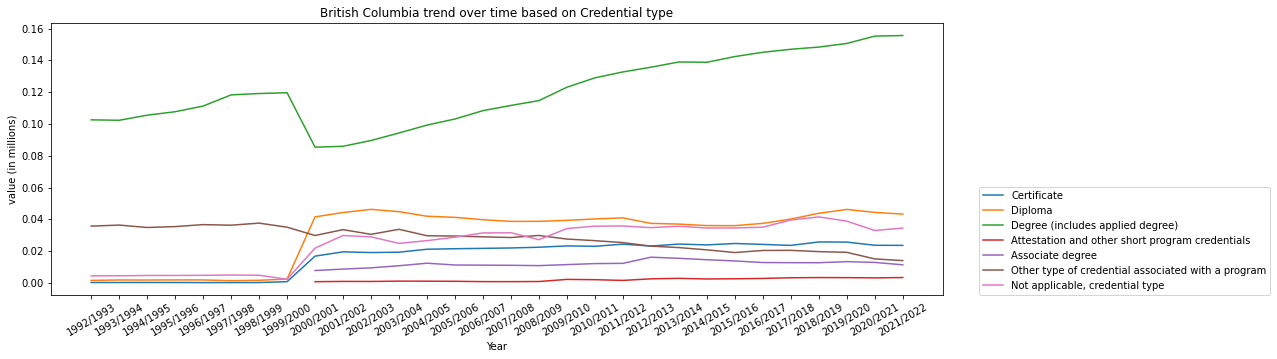

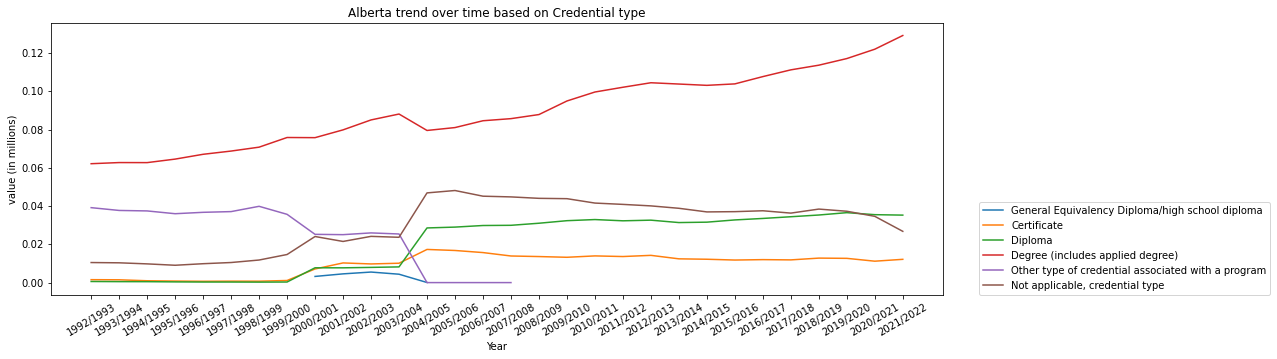

In [68]:
for province in [ontario, quebec, british_columbia, alberta]:
    get_plot(get_df(province,"credential"), "Credential type")

- In Ontario, Degree admissions is always rising and since 1999/2000 there has been a rise in the Diploma enrolments. The other type of credential associated with a program took a dive after 2004/2005.
- In Quebec, the diploma admissions took a big rise in the year 2000/2001 and there are almost equal number of admissions for the Degree and Diploma enrolments
- In British Columbia, during the year 2000/2001 degree admissions fall while the diploma admissions rise. After that there has been no growth in the diploma enrolments while degree admissions have been constantly rising.
- In Alberta, degree admissions have always been rising while diploma admissions also started rising after the 1999/2000. 

#### Trends based on Program Type

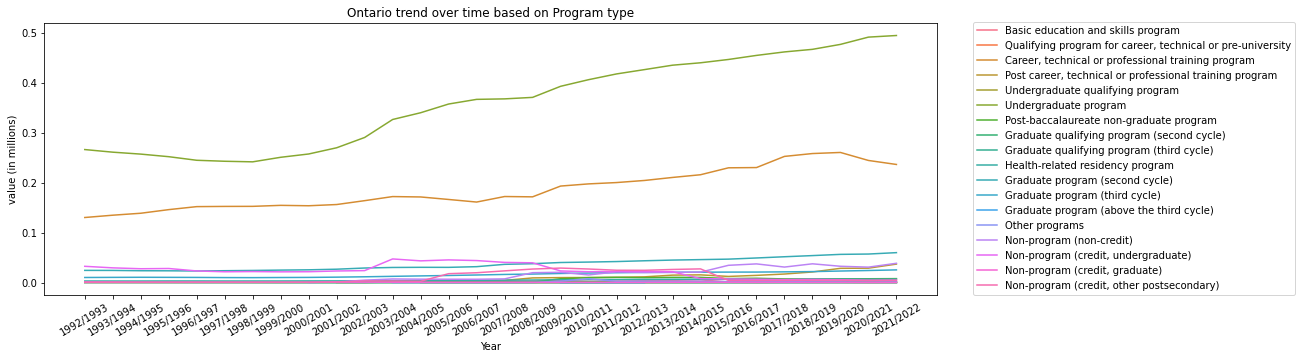

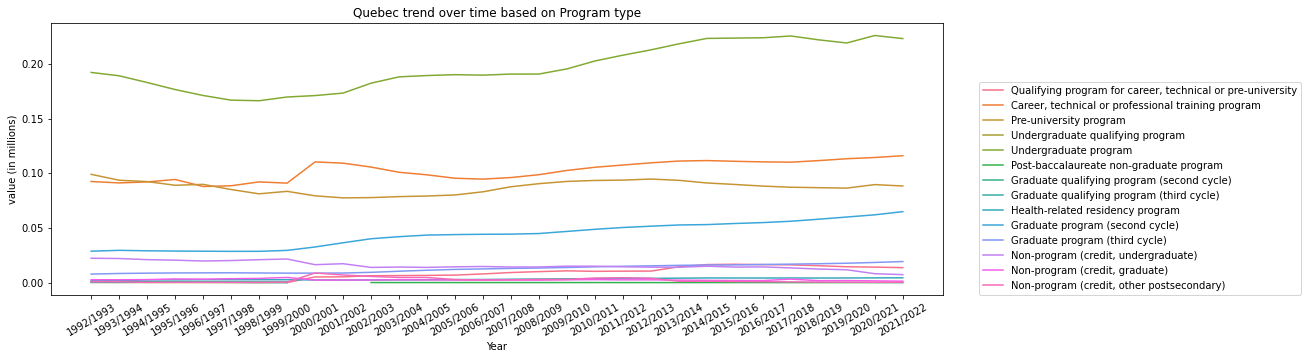

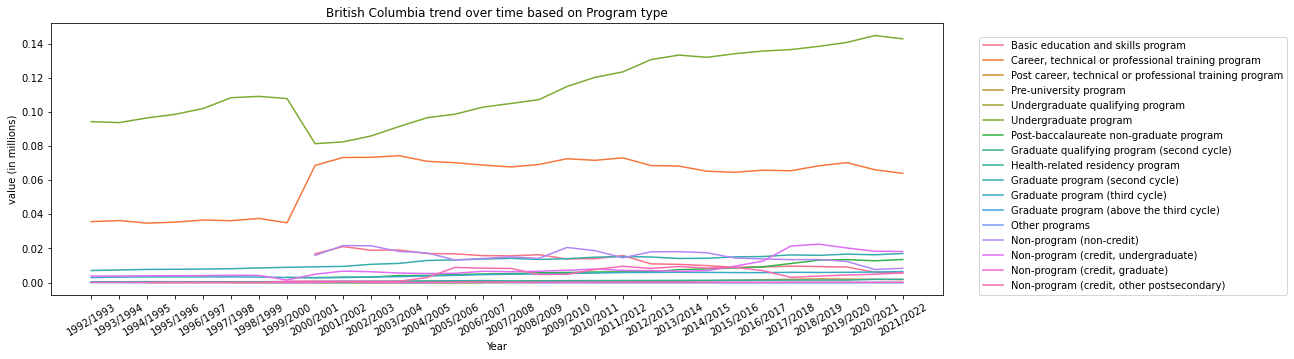

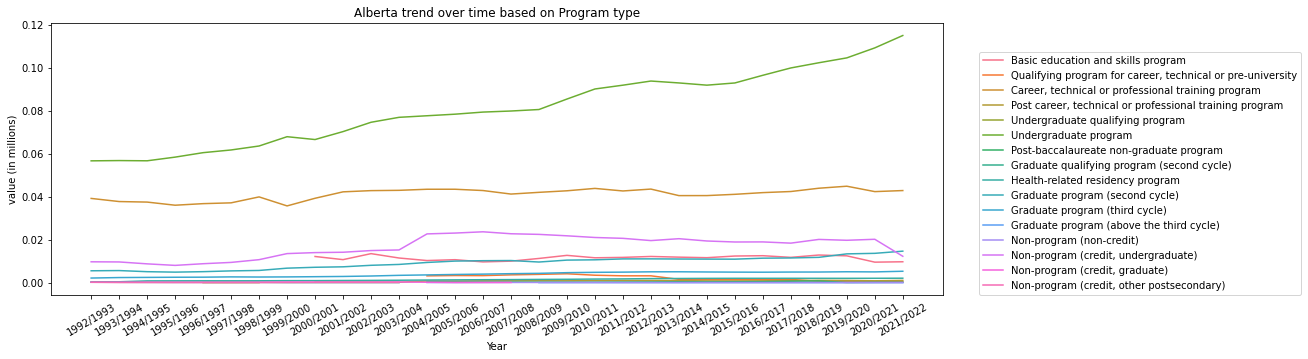

In [69]:
for province in [ontario, quebec, british_columbia, alberta]:
    get_plot(get_df(province,"program"), "Program type")

- Ontario, Quebec, and Alberta have a very similar trends based on program type.
- In Ontario, Undergraduate programs have the highest admissions every year and almost half of them are Career, Technical, or Professional training programs. The rest have stayed the same over the years.
- Similarly with Quebec, the undergrad programs have highest admission while the Career, Technical, or Professional training programs and the Pre-University Programs have almost half the number of enrolments. 
- In British Columbia, there is a similar trend with the Undergraduate programs and the Career, Technical, or Professional training programs. However, in the year 2000/2001 there was a sudden drop in Undergraduate admissions while a sudden rise in the Career, Technical, or Professional training programs.
- Alberta follows same trend as Ontario.
- Ontario always has very high number of Undergraduate admissions  

#### Trends based on Institution Type

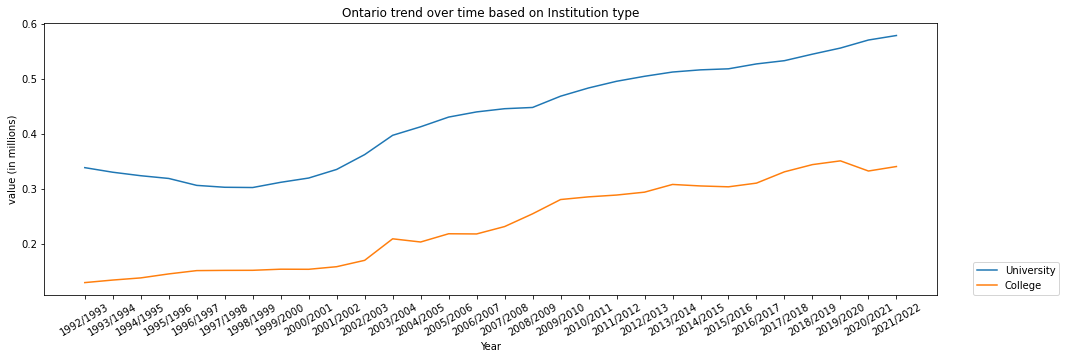

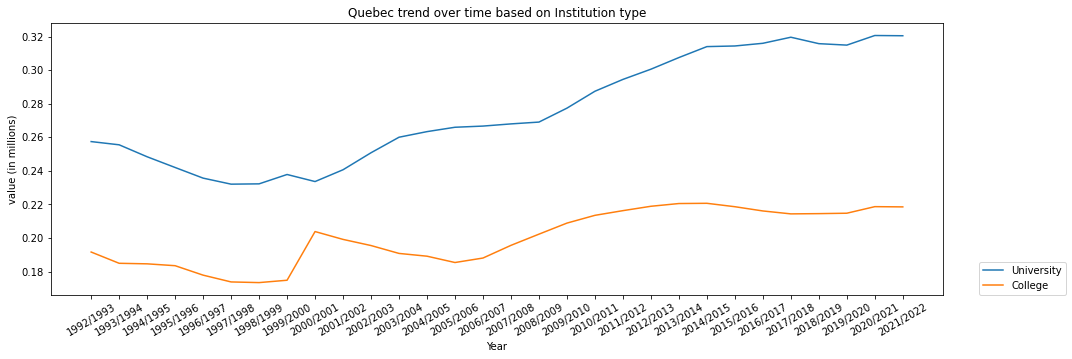

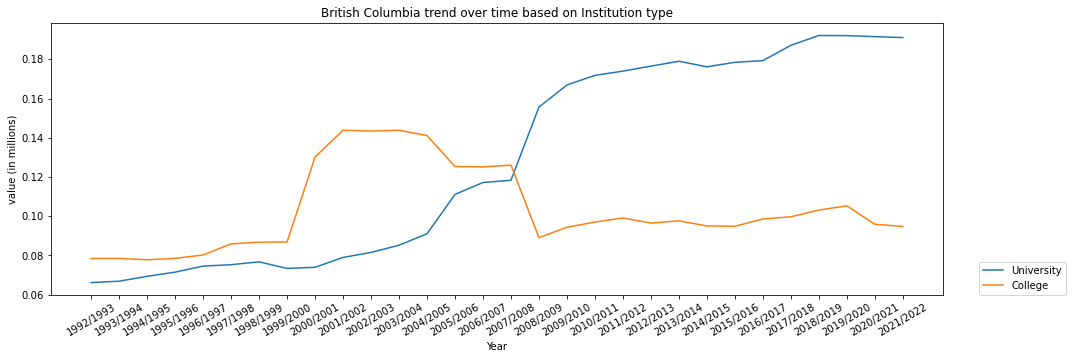

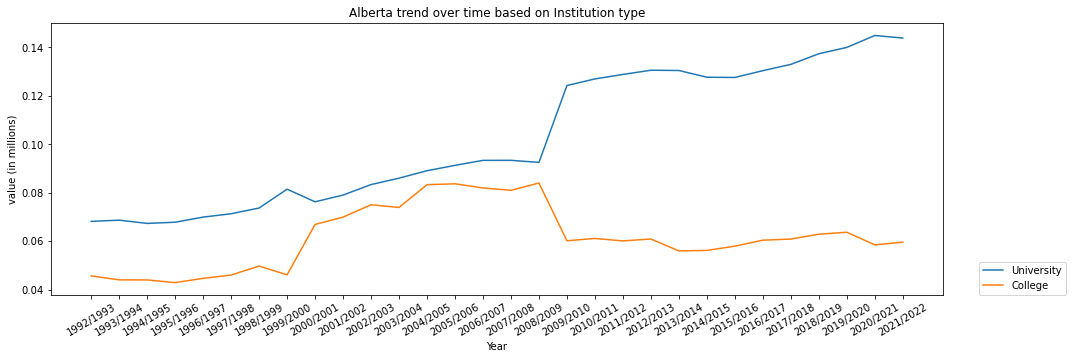

In [70]:
for province in [ontario, quebec, british_columbia, alberta]:
    get_plot(get_df(province,"institution"), "Institution type")

- In Ontario, the University admissions constantly rose after 1999 whereas college admission took a dip during COVID-19.
- In Quebec, the University addmission follow the same pattern as Ontario, whereas the college admissions suddenly grew in 2000/2001 but then took a dip till the year 2004/2005.
- In British Columbia, the University admission took a sudden rise in the year 2008/2009 but in the last 3-4 years there has been a slight decline in admissions. However, the college admission went almost double between the years 1999/2000 till 2001/2002. But it took a big fall in the year 2008/2009 and had a growth rate of almost 0.
- In Alberta, the college admission took a sudden rise in 1999/2000 and in 2009/2010 the university admission rose quickly while the college admission took a dip and there has been no growth in the college admissions since then. 